## Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.
Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.

Our Dataset has following variables:

1. **Gender**	        Male/Female
2. **age**             Age of the person
3. **education**       1 indicates High School, 2 indicates- Secondary School,3 indicates Graduation, 4 indicates Post Graduation
4. **currentSmoker**	1 Indicates person is a smoker and 0 indicates non- smoker
5. **cigsPerDay**    	Number of cigrattes consumed in a day
6. **BP Meds**	        1 indidates person is consuming BP medicines and 0 indicates person is not consuming BP medicines
7. **prevalentStroke**	1 indidates person had stroke in the past and 0 indicates person did not suffered from stroke in the past
8. **prevalentHyp**	1 indidates person is suffering from Hypertension  and 0 indicates person is not suffering from hypertension
9. **diabetes**	    1 indicates person is diabatic and 0 indicates person in non-diabetic
10. **tot cholesterol**	Indicates total cholesterol level in the body
11. **Systolic BP**	    Systolic BP of the person
12. **Diastolic BP**	Diastolic BP of the person
13. **BMI**	Indicates   BMI level in the body
14. **heartRate**	    Indicates body heartrate
15. **glucose**	        Glucose level of the body
16. **Heart-Att**	    1 Indicates  person suffered from Heart-attack and 0 indicates that the person did not suffer from Heart-attack



## Upload Required Libraries

In [1]:
import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt   

import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='white')

## Importing data

In [2]:
df = pd.read_csv("FINAL_US_Heart_Patients.csv")

## EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,gender,age,education,smoker,cigsperday,bpmeds,stroke,hyper,diabetes,totchol,sysBP,diaBP,bmi,heartrate,glucose,attack
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0



### Shape

In [4]:
df.shape

(4240, 16)

### Data type of data features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      4232 non-null   object 
 1   age         4238 non-null   float64
 2   education   4130 non-null   float64
 3   smoker      4237 non-null   float64
 4   cigsperday  4209 non-null   float64
 5   bpmeds      4180 non-null   float64
 6   stroke      4231 non-null   float64
 7   hyper       4238 non-null   float64
 8   diabetes    4238 non-null   float64
 9   totchol     4180 non-null   float64
 10  sysBP       4236 non-null   float64
 11  diaBP       4235 non-null   float64
 12  bmi         4216 non-null   float64
 13  heartrate   4236 non-null   float64
 14  glucose     3849 non-null   float64
 15  attack      4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


Making different list for categorical columns and numerical columns based on the above.

In [6]:
cat=["gender","education","smoker","bpmeds","stroke","hyper","diabetes","attack"]
num =[x for x in df.columns if x not in cat] # list comprehension

print(cat)
print(num)

['gender', 'education', 'smoker', 'bpmeds', 'stroke', 'hyper', 'diabetes', 'attack']
['age', 'cigsperday', 'totchol', 'sysBP', 'diaBP', 'bmi', 'heartrate', 'glucose']


### Summary Statistics

In [7]:
df[num].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,50.0,9.0,32.0,42.0,49.0,56.0,70.0
cigsperday,4209.0,9.0,12.0,0.0,0.0,0.0,20.0,70.0
totchol,4180.0,237.0,45.0,107.0,206.0,234.0,263.0,696.0
sysBP,4236.0,132.0,22.0,84.0,117.0,128.0,144.0,295.0
diaBP,4235.0,83.0,12.0,48.0,75.0,82.0,90.0,142.0
bmi,4216.0,26.0,4.0,16.0,23.0,25.0,28.0,57.0
heartrate,4236.0,76.0,12.0,44.0,68.0,75.0,83.0,143.0
glucose,3849.0,82.0,24.0,40.0,71.0,78.0,87.0,394.0


In [8]:
for catvar in cat:
    print(catvar,'  No of Levels:',df[catvar].nunique())
    print(df[catvar].value_counts())
    print('\n\n')

gender   No of Levels: 2
Female    2414
Male      1818
Name: gender, dtype: int64



education   No of Levels: 4
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: education, dtype: int64



smoker   No of Levels: 2
0.0    2143
1.0    2094
Name: smoker, dtype: int64



bpmeds   No of Levels: 2
0.0    4056
1.0     124
Name: bpmeds, dtype: int64



stroke   No of Levels: 2
0.0    4206
1.0      25
Name: stroke, dtype: int64



hyper   No of Levels: 2
0.0    2922
1.0    1316
Name: hyper, dtype: int64



diabetes   No of Levels: 2
0.0    4129
1.0     109
Name: diabetes, dtype: int64



attack   No of Levels: 2
0    3596
1     644
Name: attack, dtype: int64





Checking Target Variable class proportion.

In [9]:
df['attack'].value_counts(1)*100

0    84.811321
1    15.188679
Name: attack, dtype: float64

### Missing Values

In [10]:
# Are there any missing values ?
df.isnull().sum() #.isna().sum()

gender          8
age             2
education     110
smoker          3
cigsperday     31
bpmeds         60
stroke          9
hyper           2
diabetes        2
totchol        60
sysBP           4
diaBP           5
bmi            24
heartrate       4
glucose       391
attack          0
dtype: int64

All independent features have missing values

### Duplicate Values

In [11]:
## Are there any duplicate records?

dups = df.duplicated()
dups.sum()

0

## Missing values Imputation

In [12]:
df.gender.mode()

0    Female
dtype: object

In [13]:
df.gender=df.gender.fillna("Female")

In [14]:
for column in cat:
    df[column].fillna(df[column].mode()[0], inplace=True)

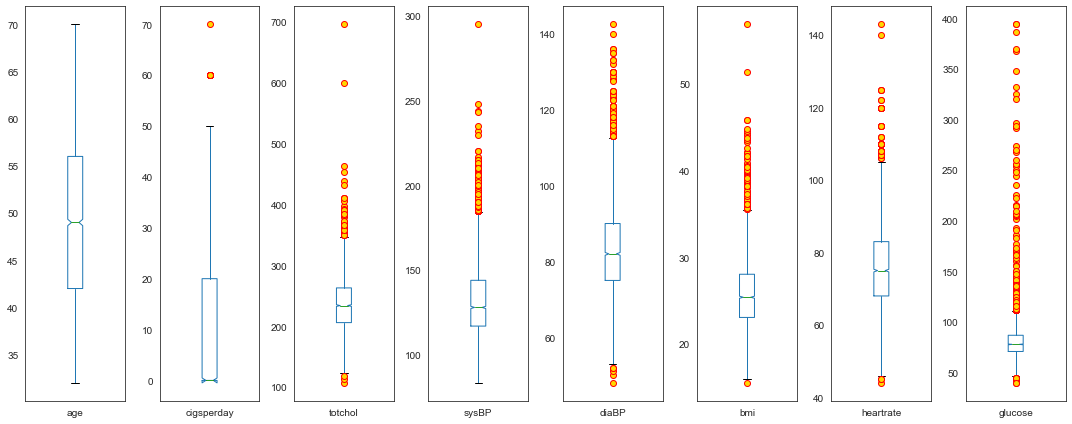

In [15]:
# construct box plot for continuous variables
df[num].plot(kind = 'box', subplots = True, figsize = (15,6))
plt.tight_layout();

No outliers are present here in "age", we will use mean to impute null values in "age" column

In [16]:
df.age=df.age.fillna(df.age.mean())

All other variables have possible ouliers and hence median would be used for imputation

In [17]:
for i in num:
    if i != 'age':
        df[i].fillna(df[i].median(),inplace=True)

In [18]:
df.isnull().sum()

gender        0
age           0
education     0
smoker        0
cigsperday    0
bpmeds        0
stroke        0
hyper         0
diabetes      0
totchol       0
sysBP         0
diaBP         0
bmi           0
heartrate     0
glucose       0
attack        0
dtype: int64

All null values have been appropriately imputed

## Univariate Analysis

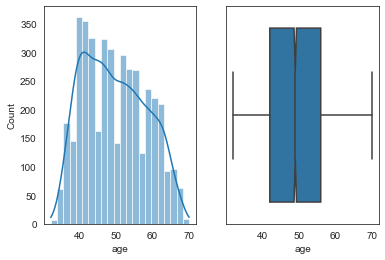

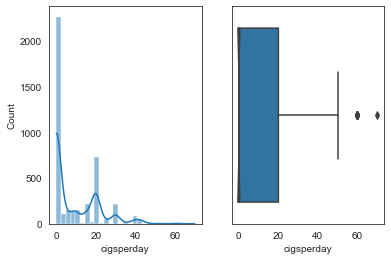

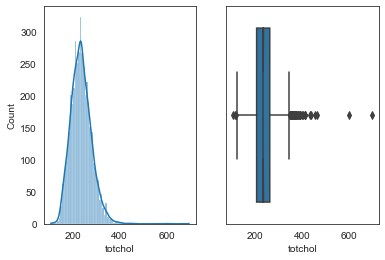

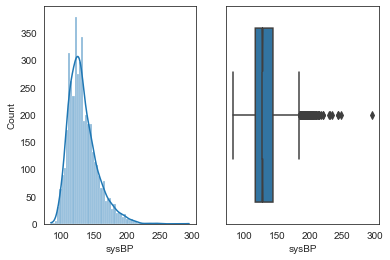

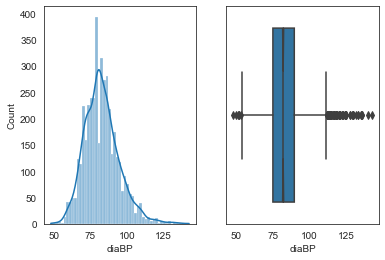

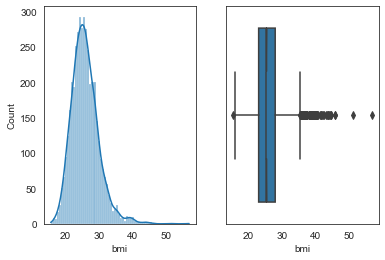

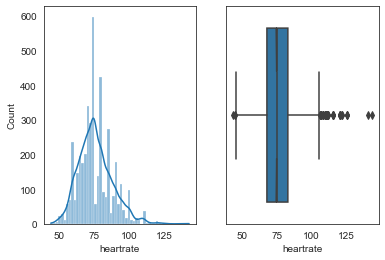

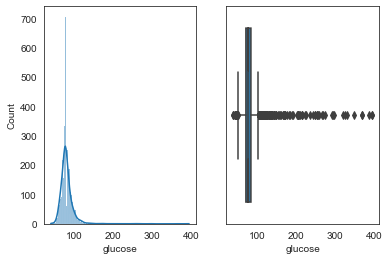

In [19]:
for cols in num:
    fig,(axes1,axes2) = plt.subplots(nrows=1,ncols=2)
    sns.histplot(data=df,x=cols,kde=True,ax=axes1);
    sns.boxplot(data = df, x=cols, ax=axes2);
    plt.show();

**There are some possible outliers and the same would be treated accordingly.**

##  Bivariate and Multivariate Analysis

### Target Variable vs Numeric Independent Variables

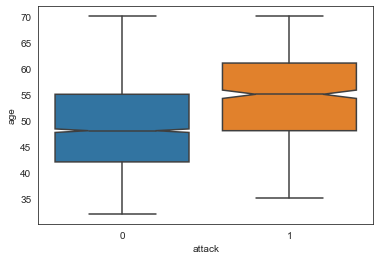

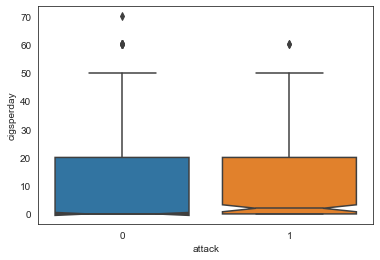

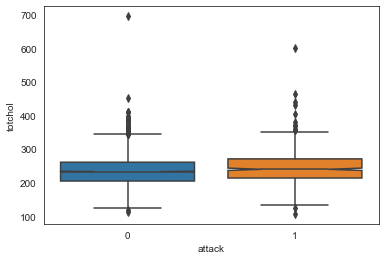

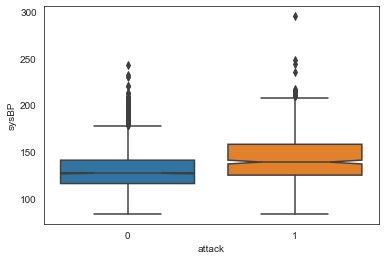

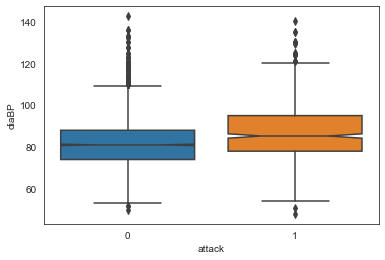

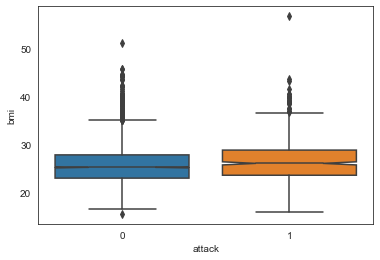

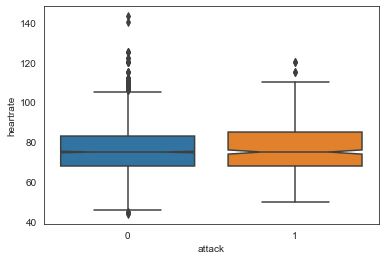

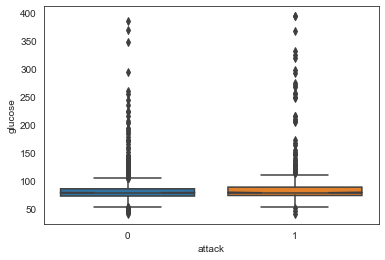

In [20]:
for cols in num:
    sns.boxplot(data=df,x='attack',y=cols)
    plt.show();

### Target Variable vs Categorical Independent Variables

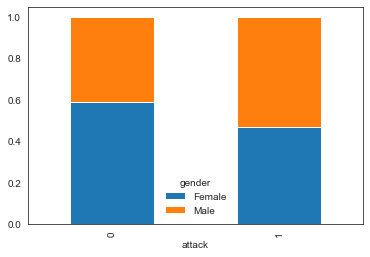

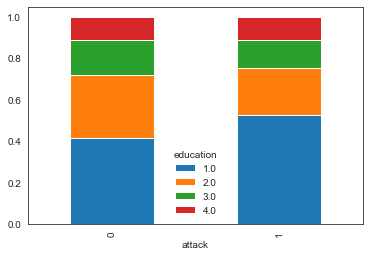

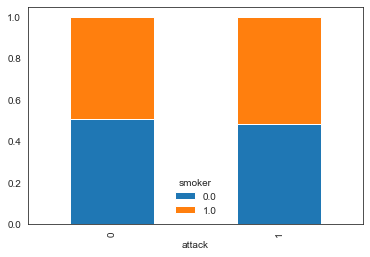

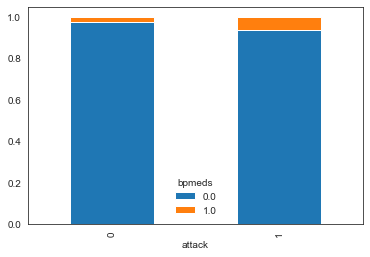

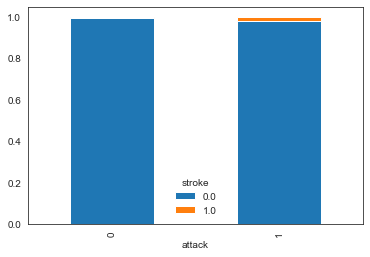

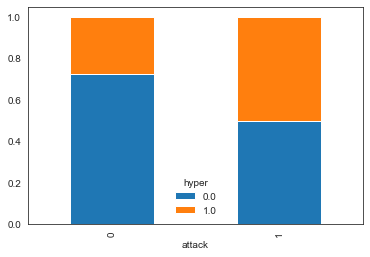

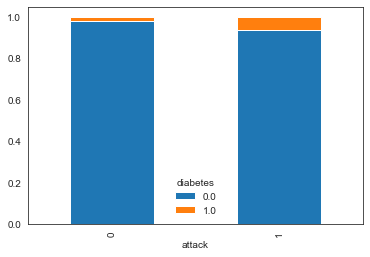

In [21]:
for cols in cat:
    if cols != 'attack':
        tab = pd.crosstab(df['attack'],df[cols],normalize='index')
        tab.plot(kind='bar',stacked = True)
        plt.show();

### Correlation Plot

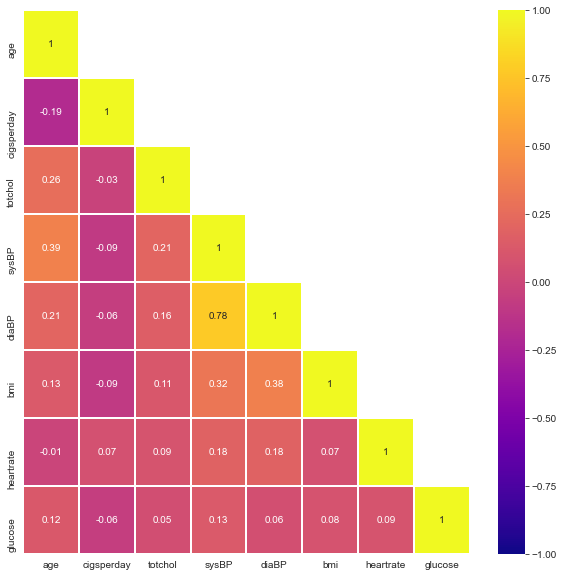

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr().round(2),
            annot=True, 
            mask = np.triu(np.ones_like(df[num].corr()),1),
            cmap='plasma',
            vmin =-1, 
            vmax=1, 
            linewidths=2, 
            annot_kws={'size':10});


As expected, systolic BP and Diastolic BP are highly correlated. One of them would be dropped.

In [25]:
# Dropping Systolic_BP
df.drop(['sysBP'], axis = 1,inplace=True)

In [26]:
num.remove('sysBP') # removing the dropped variable from list of numeric variables

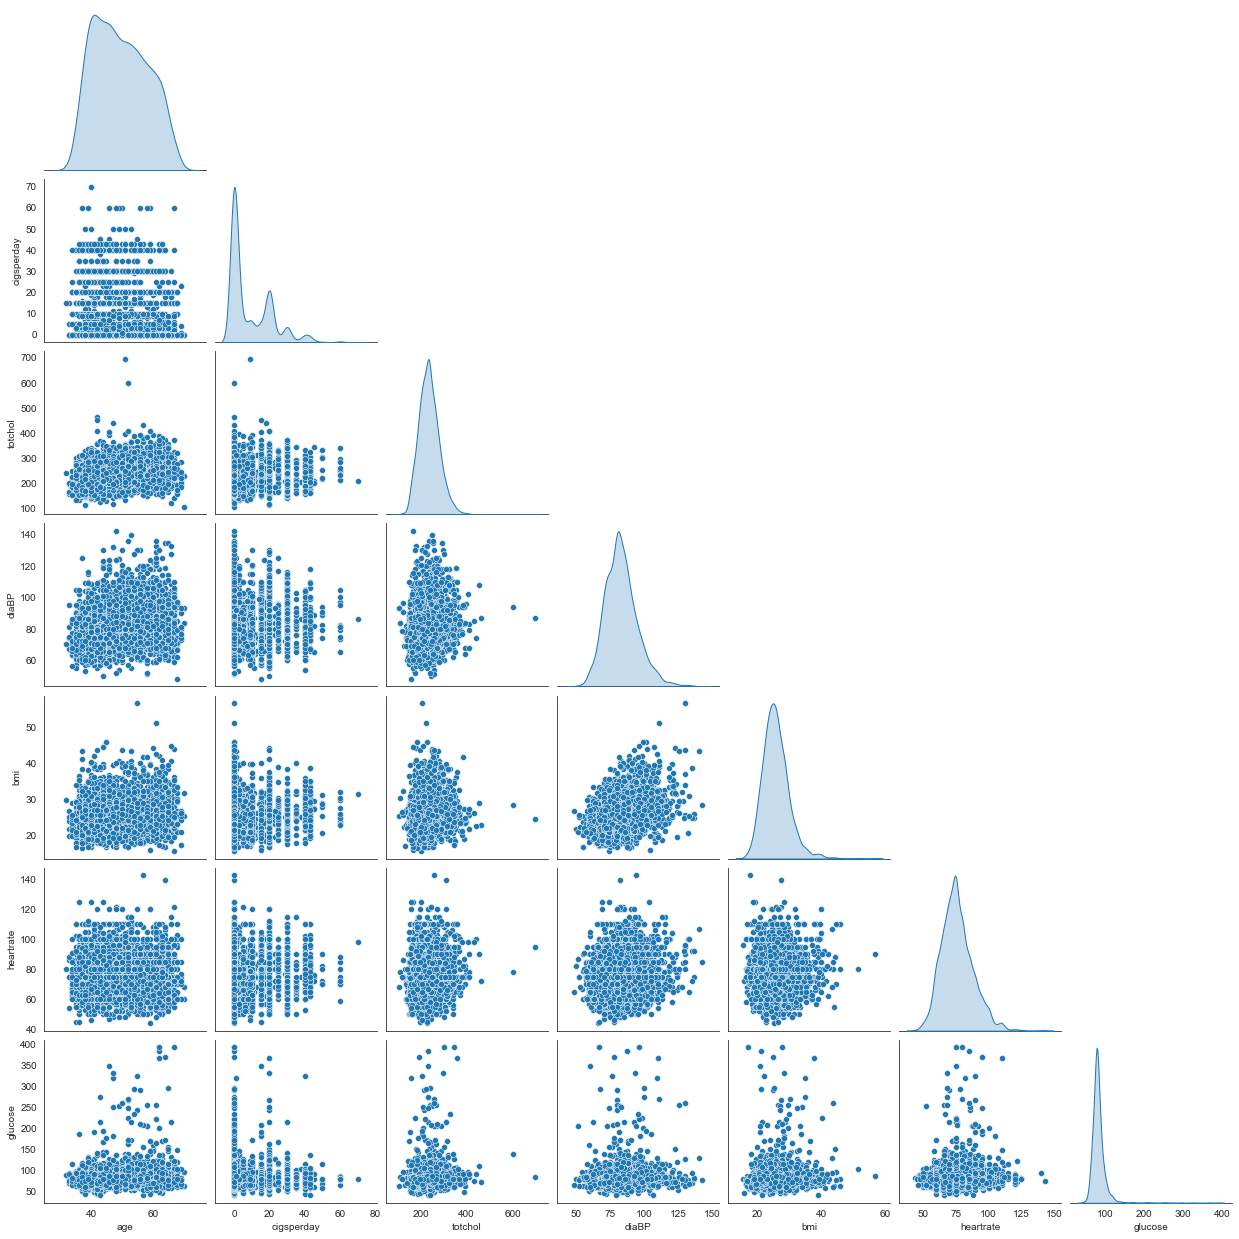

In [27]:
sns.pairplot(df[num], corner=True, diag_kind='kde');

In [28]:
df =pd.get_dummies(df, columns=['gender'],drop_first=True)

In [29]:
df.head()

,age,education,smoker,cigsperday,bpmeds,stroke,hyper,diabetes,totchol,diaBP,bmi,heartrate,glucose,attack,gender_Male
0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,70.0,26.97,80.0,77.0,0,1
1,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,81.0,28.73,95.0,76.0,0,0
2,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,80.0,25.34,75.0,70.0,0,1
3,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,95.0,28.58,65.0,103.0,1,0
4,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,84.0,23.10,85.0,85.0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4240 non-null   float64
 1   education    4240 non-null   float64
 2   smoker       4240 non-null   float64
 3   cigsperday   4240 non-null   float64
 4   bpmeds       4240 non-null   float64
 5   stroke       4240 non-null   float64
 6   hyper        4240 non-null   float64
 7   diabetes     4240 non-null   float64
 8   totchol      4240 non-null   float64
 9   diaBP        4240 non-null   float64
 10  bmi          4240 non-null   float64
 11  heartrate    4240 non-null   float64
 12  glucose      4240 non-null   float64
 13  attack       4240 non-null   int64  
 14  gender_Male  4240 non-null   uint8  
dtypes: float64(13), int64(1), uint8(1)
memory usage: 468.0 KB


## outlier treatment

We already know from EDA that of the variables of continuous nature in the dataset, except age, rest have outliers.

In [31]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for column in num:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

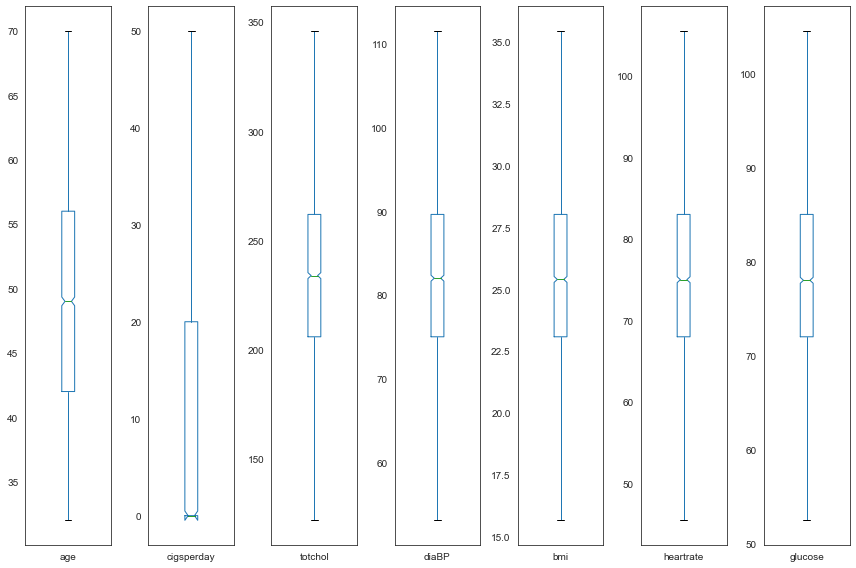

In [33]:
df[num].plot(kind = 'box', subplots = True, figsize=(12,8))
plt.tight_layout();

## Train-Test Split

In [34]:
# Copy all the predictor variables into X dataframe
X = df.drop('attack', axis=1)

# Copy target into the y dataframe.  
y = df['attack']

In [35]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

## Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes Model

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score

In [40]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

### Training Performance

In [41]:
## Performance Matrix on train data set
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train) # acc score
NB_train_recall_score = recall_score(y_train,NB_train_predict)
print(NB_train_score,NB_train_recall_score)

0.8311320754716981 0.14730290456431536


In [ ]:
# plot_confusion_matrix(NB_model,X_train,y_train);
# plt.grid(b=False,axis='both');

In [ ]:
# print(classification_report(y_train, NB_train_predict))

### Test Performance

In [42]:
## Performance Matrix on test data set
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score = recall_score(y_test,NB_test_predict)
print(NB_test_score,NB_test_recall_score)

0.8311320754716981 0.16049382716049382


In [ ]:
# plot_confusion_matrix(NB_model, X_test, y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, NB_test_predict))



## Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Training Performance

In [44]:
## Performance Matrix on train data set
LDA_train_predict = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
LDA_train_recall_score = recall_score(y_train,LDA_train_predict)
print(LDA_train_score,LDA_train_recall_score)

0.8503144654088051 0.06846473029045644


In [ ]:
# plot_confusion_matrix(LDA_model,X_train,y_train)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, LDA_train_predict))

### Test Performance

In [45]:
## Performance Matrix on test data set
LDA_test_predict = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
LDA_test_recall_score = recall_score(y_test,LDA_test_predict)
print(LDA_test_score,LDA_test_recall_score)

0.8509433962264151 0.07407407407407407


In [ ]:
# plot_confusion_matrix(LDA_model,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, LDA_test_predict))

## Ada Boost

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

### Training Performance

In [48]:
## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score = recall_score(y_train,ADB_train_predict)
print(ADB_train_score,ADB_train_recall_score)

0.8575471698113207 0.1016597510373444


In [ ]:
# plot_confusion_matrix(ADB_model,X_train,y_train);
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, ADB_train_predict))

### Test Performance

In [49]:
## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score = recall_score(y_test,ADB_test_predict)
print(ADB_test_score,ADB_test_recall_score)

0.8490566037735849 0.08024691358024691


In [ ]:
# plot_confusion_matrix(ADB_model,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, ADB_test_predict))

## Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)

In [51]:
gbcl = gbcl.fit(X_train, y_train)

### Training Performance

In [52]:
## Performance Matrix on train data set
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score = recall_score(y_train,gbcl_train_predict)
print(gbcl_train_score,gbcl_train_recall_score)

0.8783018867924528 0.2012448132780083


In [ ]:
# plot_confusion_matrix(gbcl,X_train,y_train)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, gbcl_train_predict))

### Test Performance

In [53]:
## Performance Matrix on test data set
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score = recall_score(y_test, gbcl_test_predict)
print(gbcl_test_score,gbcl_test_recall_score)

0.8471698113207548 0.08024691358024691


In [ ]:
# plot_confusion_matrix(gbcl,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, gbcl_test_predict))

## KNN Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

### Training Performance

In [55]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score = recall_score(y_train,KNN_train_predict)
print(KNN_train_score,KNN_train_recall_score)

0.8632075471698113 0.1950207468879668


In [ ]:
# plot_confusion_matrix(KNN_model,X_train,y_train)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, KNN_train_predict))

### Test Performance

In [56]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score = recall_score(y_test,KNN_test_predict)
print(KNN_test_score,KNN_test_recall_score)

0.8320754716981132 0.06172839506172839


In [ ]:
# plot_confusion_matrix(KNN_model,X_test, y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, KNN_test_predict))

## Decision Tree

In [57]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Training Data

In [58]:
## Performance Matrix on train data set
DT_train_predict = DT_model.predict(X_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_train_recall_score = recall_score(y_train,DT_train_predict)
print(DT_train_score,DT_train_recall_score)

1.0 1.0


In [ ]:
# plot_confusion_matrix(DT_model,X_train,y_train)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, DT_train_predict))

### Test Performance

In [59]:
## Performance Matrix on test data set
DT_test_predict = DT_model.predict(X_test)
DT_test_score = DT_model.score(X_test, y_test)
DT_test_recall_score = recall_score(y_test, DT_test_predict)
print(DT_test_score,DT_test_recall_score)

0.7754716981132076 0.2839506172839506


In [ ]:
# plot_confusion_matrix(DT_model, X_test, y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, DT_test_predict))

## Random Forest

In [60]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Training Performance

In [61]:
## Performance Matrix on train data set
RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score = recall_score(y_train,RF_train_predict)
print(RF_train_score,RF_train_recall_score)

1.0 1.0


In [ ]:
# plot_confusion_matrix(RF_model, X_train,y_train)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, RF_train_predict))

### Test Performace

In [62]:
## Performance Matrix on test data set
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score = recall_score(y_test, RF_test_predict)
print(RF_test_score,RF_test_recall_score)

0.85 0.05555555555555555


In [ ]:
# plot_confusion_matrix(RF_model,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, RF_test_predict))

## Bagging

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,
                                n_estimators=100,
                                random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

### Training Performance

In [64]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score = recall_score(y_train,Bagging_train_predict)
print(Bagging_train_score, Bagging_train_recall_score)

1.0 1.0


In [ ]:
# plot_confusion_matrix(Bagging_model,X_train, y_train)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train, Bagging_train_predict))

### Test Performance

In [65]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score = recall_score(y_test, Bagging_test_predict)
print(Bagging_test_score, Bagging_test_recall_score)

0.8367924528301887 0.08024691358024691


In [ ]:
# plot_confusion_matrix(Bagging_model,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, Bagging_test_predict))

## Comparison of Different Models

Interest Class or Postive class is 1 i.e. attack = 1

Let's look at the performance of all the models on the Train & Test Data set

Recall refers to the percentage of Actual positive results that are correctly classified as positive by the algorithm and hence we will compare Recall of class "1" for all models.

In [66]:
model_names = ['Naive-Bayes','LDA','ADABoost',
              'GradientBoost','KNN','DecisionTree',
              'RF','Bagging']

train_recalls = [NB_train_recall_score,LDA_train_recall_score,
                ADB_train_recall_score,gbcl_train_recall_score,
                KNN_train_recall_score,DT_train_recall_score,
                RF_train_recall_score,
                 Bagging_train_recall_score]
test_recalls = [NB_test_recall_score,LDA_test_recall_score,
               ADB_test_recall_score,gbcl_test_recall_score,
               KNN_test_recall_score,DT_test_recall_score,
               RF_test_recall_score,Bagging_test_recall_score]

recall_df = pd.DataFrame({'train_recall':train_recalls,
                         'test_recall':test_recalls},
                        index=model_names)
recall_df


,train_recall,test_recall
Naive-Bayes,0.147303,0.160494
LDA,0.068465,0.074074
ADABoost,0.101660,0.080247
GradientBoost,0.201245,0.080247
KNN,0.195021,0.061728
DecisionTree,1.000000,0.283951
RF,1.000000,0.055556
Bagging,1.000000,0.080247


So as per the train data, 
Worst performing model is - Linear Discriminant Analysis

Best Performing models are - Decision Tree ,  Random Forest and Bagging

However are these best performing models overfitted??

Let's look at the performance on the test data set

**Recall on the Test Data Set**

Model which have not performed well on the train data set , also have not performed well on the test data set
However Decision Tree ,Random Forest and Bagging which had a 100% score on the train data set have shown a poor result on the test data set .. Hence a clear case of overfitting.



## Conclusion

**So we will select models which have performed approximately similar on the train and test data set and apply SMOTE on the same to check if the performance improves or not eg. Naive Bayes and KNN**

## SMOTE 

In [ ]:
# !pip install imblearn (from notebook) or 
# pip install imblearn (from anaconda prompt)
# Above is required to be done once only for installing the module

In [67]:
from imblearn.over_sampling import SMOTE

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# RandomUnderSampler()

**SMOTE is only applied on the train data set**

In [68]:
sm = SMOTE(random_state=2)

In [69]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [ ]:
# sm.fit_resample(X_train,y_train)

In [70]:
y_train.value_counts()

0    2698
1     482
Name: attack, dtype: int64

In [71]:
2698-482

2216

In [72]:
y_train.value_counts(1)

0    0.848428
1    0.151572
Name: attack, dtype: float64

In [73]:
y_train_res.value_counts(1)

0    0.5
1    0.5
Name: attack, dtype: float64

In [74]:
y_train_res.value_counts()

0    2698
1    2698
Name: attack, dtype: int64

In [75]:
X_train.shape, X_train_res.shape

((3180, 14), (5396, 14))

In [76]:
5396-3180

2216

## Naive Bayes with SMOTE

In [77]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

### Training Performance

In [78]:
## Performance Matrix on train data set with SMOTE
NBSM_train_predict = NB_SM_model.predict(X_train_res)
NBSM_train_score = NB_SM_model.score(X_train_res, y_train_res)
NBSM_train_recall = recall_score(y_train_res,NBSM_train_predict)
print(NBSM_train_score,NBSM_train_recall)

0.6156412157153447 0.40400296515937734


In [ ]:
# plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train_res ,NBSM_train_predict))

### Test Performance

In [79]:
## Performance Matrix on test data set
NBSM_test_predict = NB_SM_model.predict(X_test)
NBSM_test_score = NB_SM_model.score(X_test, y_test)
NBSM_test_recall = recall_score(y_test,NBSM_test_predict)
print(NBSM_test_score,NBSM_test_recall)

0.7669811320754717 0.41975308641975306


In [ ]:
# plot_confusion_matrix(NB_SM_model,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, NBSM_test_predict))

## KNN With SMOTE

In [80]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

### Training Performance

In [81]:
## Performance Matrix on train data set
KNN_SM_train_predict = KNN_SM_model.predict(X_train_res)
KNN_SM_train_score = KNN_SM_model.score(X_train_res, y_train_res)
KNN_SM_train_recall_score = recall_score(y_train_res,KNN_SM_train_predict)
print(KNN_SM_train_score,KNN_SM_train_recall_score)

0.8708302446256486 0.9911045218680504


In [ ]:
# plot_confusion_matrix(KNN_SM_model,X_train_res,y_train_res)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_train_res, KNN_SM_train_predict))

### Test Performance

In [82]:
## Performance Matrix on test data set
KNN_SM_test_predict = KNN_SM_model.predict(X_test)
KNN_SM_test_score = KNN_SM_model.score(X_test, y_test)
KNN_SM_test_recall = recall_score(y_test,KNN_SM_test_predict)
print(KNN_SM_test_score,KNN_SM_test_recall)

0.6150943396226415 0.49382716049382713


In [ ]:
# plot_confusion_matrix(KNN_SM_model,X_test,y_test)
# plt.grid(b=False);

In [ ]:
# print(classification_report(y_test, KNN_SM_test_predict))

## Conclusion after SMOTE

- Recall for Naive Bayes increased significantly.
- Huge Difference between the train and test dataset Recall value for KNN.

Note: SMOTE as a technique is generally applied if minority class is below 5%. 

You are advised to perform SMOTE on other models as well to compare the result

## Cross Validation on Naive Bayes Model

In [84]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [ ]:
# kf=KFold()

In [ ]:
# skf= StratifiedKFold()

In [85]:
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10) # cv = kf or skf
scores # accuracy scores

array([0.63518519, 0.60185185, 0.62222222, 0.62962963, 0.6       ,
       0.61666667, 0.6122449 , 0.6270872 , 0.61781076, 0.58441558])

In [86]:
scores.mean()

0.6147113997113997

In [87]:
rec_scores = cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,scoring='recall')
rec_scores # recall scores on each iteration of the 10 fold cross validation

array([0.4037037 , 0.42222222, 0.4037037 , 0.41111111, 0.38888889,
       0.40740741, 0.42379182, 0.41635688, 0.40740741, 0.35185185])

In [88]:
rec_scores.mean() # average recall score across all iterations of 10 fold cv

0.40364449951810555

In [ ]:
## After 10 fold cross validation, accuracy & recall scores respectively for all 10 folds are almost same. 
## Hence our model is valid.
## Students are advised to perform CV on other models and compare the results.

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).
Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model.**